In [1]:
# Bibliotecas para manipulação dos dados e arquivos

import numpy as np # algebra linear
import pandas as pd # processamento de dados, arquivos CSV I/O. 

# Para gráficos 
from matplotlib import pyplot as plt
import seaborn as sns

# Biblioteca para ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ignorar avisos
import warnings  
warnings.filterwarnings('ignore')

Etapa 1 - Carregando os dados dos arquivo CSV a partir do Pandas e salvando nas variáveis "train" e "test"

In [3]:
# Carregando os datasets de treino e teste
train = pd.read_csv("horse.csv")
test = pd.read_csv("horseTest.csv")

1. Etapa 2 - Análise exploratória dos dados

In [4]:
# Verificando as dimensões dos datasets
print("--- Dataset Treino ---")
print("Variáveis:\t{}\nEntradas:\t{}\n".format(train.shape[1], train.shape[0]))

print("--- Dataset Teste ---")
print("Variáveis:\t{}\nEntradas:\t{}".format(test.shape[1], test.shape[0]))

--- Dataset Treino ---
Variáveis:	28
Entradas:	299

--- Dataset Teste ---
Variáveis:	28
Entradas:	89


In [5]:
# Identificando os tipos de dados e os exemplos de registro do dataset
display(train.dtypes)
display(train.dtypes.value_counts())
display(train.head())

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

object     17
float64     7
int64       4
dtype: int64

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [6]:
#Visão geral das variáveis numéricas
train.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


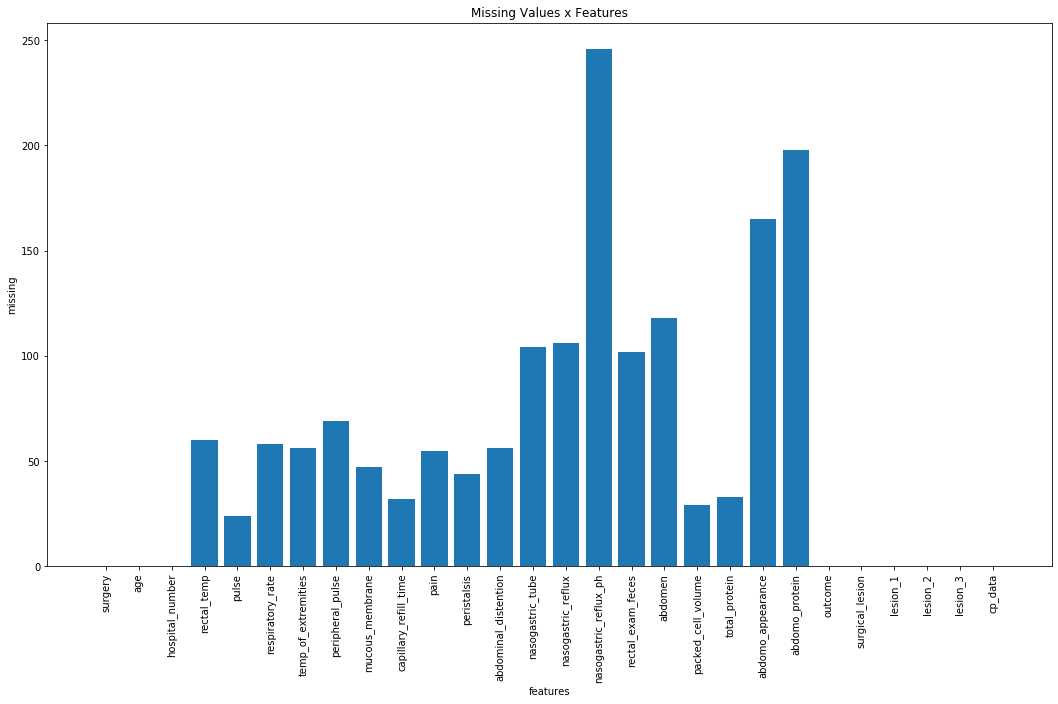

In [7]:
# Checando e comparando os missing values das features de treino
qtde_nulos = train.isna().sum()

print(qtde_nulos)

plt.figure(figsize=(18,10))
plt.bar(range(len(qtde_nulos)), qtde_nulos)
plt.title('Missing Values x Features')
plt.xlabel('features')
plt.ylabel('missing')
plt.xticks(list(range(len(train.columns))), list(train.columns.values), rotation='vertical')
plt.show()

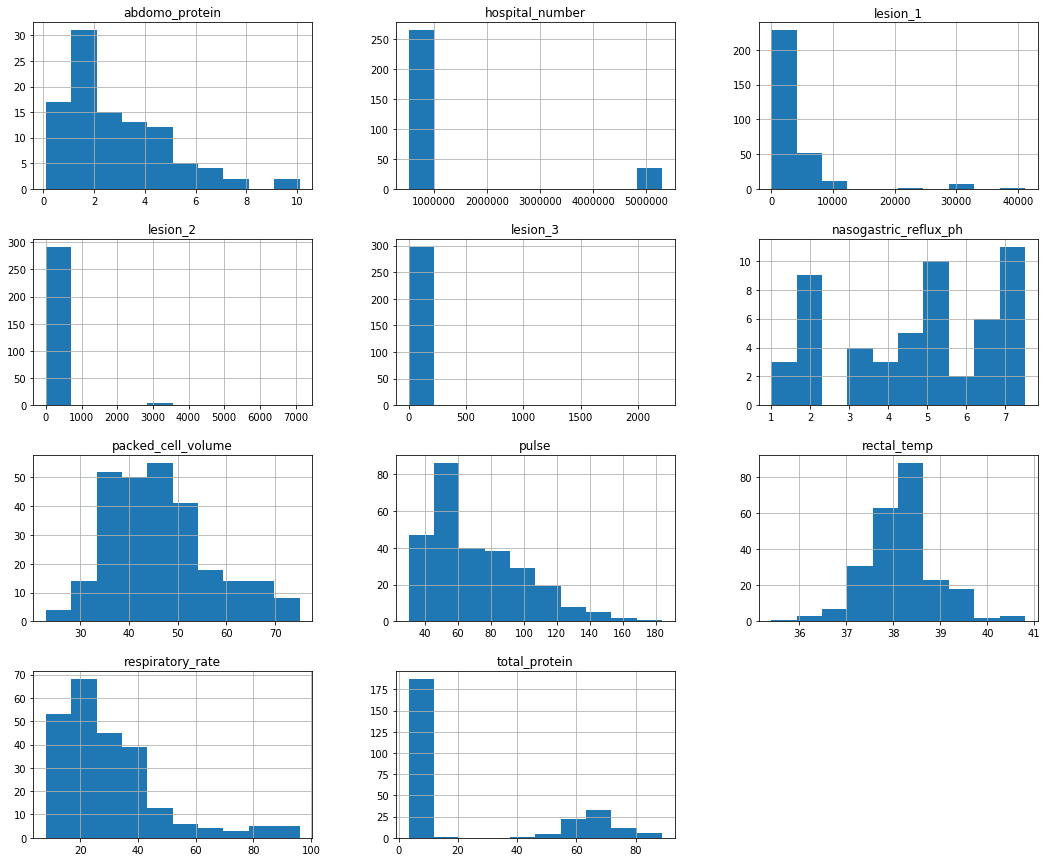

In [8]:
# Ver histograma das variáveis numéricas
train.hist(figsize=(18,15));

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64


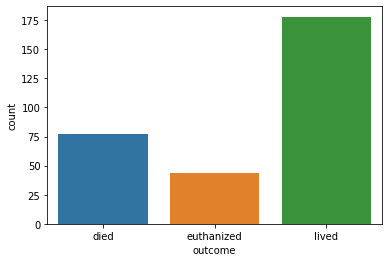

In [9]:
# Ver os rótulos do dataset e respectivas quantidades
sns.countplot(data=train, x='outcome');
print(train.outcome.value_counts())


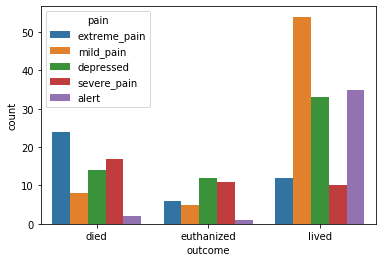

In [10]:
sns.countplot(data=train, x='outcome', hue='pain');
plt.show()
#Uma grande maioria dos cavalos que morreram sentiu dor extrema ou intensa. 
#Enquanto a maioria dos cavalos submetidos à eutanásia experimentou dor intensa ou deprimida.

Text(0.5, 0.98, 'Outcome por Pulso')

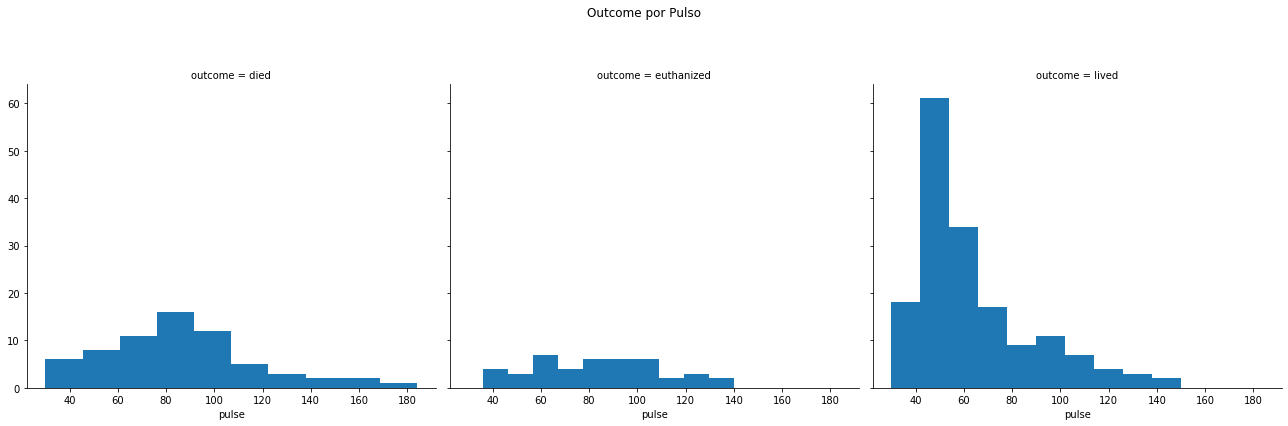

In [11]:
g = sns.FacetGrid(data=train, col='outcome', margin_titles=True, height=6)
g.map(plt.hist, 'pulse')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Outcome por Pulso')

# A maioria dos cavalos que morreram teve um pulso de aproximadamente 80-100 bpm.

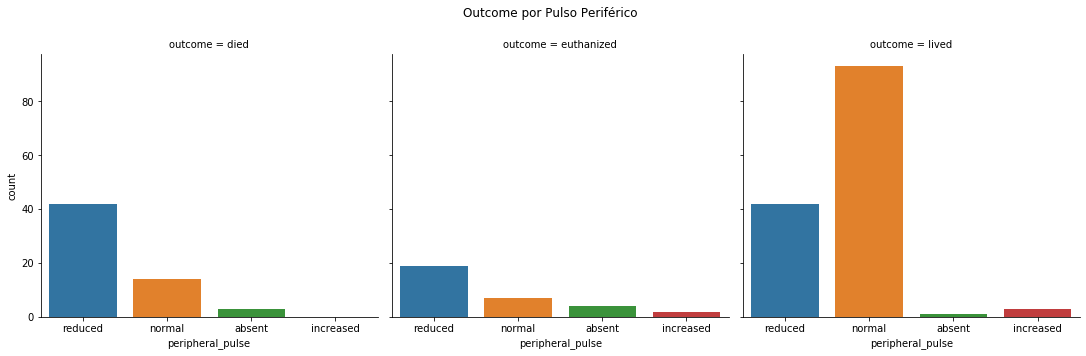

In [12]:
g = sns.catplot(data=train, x='peripheral_pulse', col='outcome', kind='count');
g.fig.suptitle('Outcome por Pulso Periférico');
plt.subplots_adjust(top=0.85)

#Mais da metade dos cavalos que morreram ou foram sacrificados tiveram um pulso periférico reduzido.

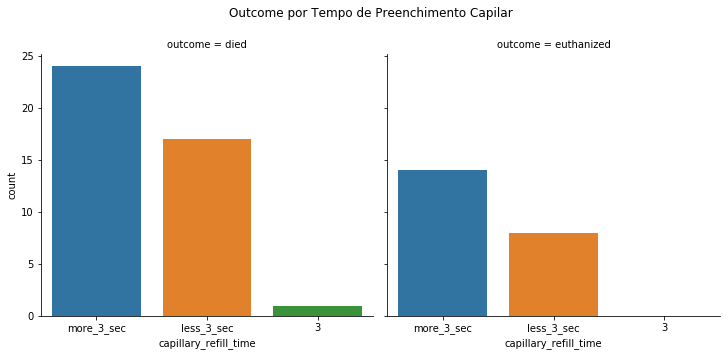

In [13]:
reduced_absent_pulse = train[train.outcome.isin(('died','euthanized')) & train.peripheral_pulse.isin(('reduced','absent'))]

g = sns.catplot(data=reduced_absent_pulse, x='capillary_refill_time', col='outcome', kind='count');
g.fig.suptitle('Outcome por Tempo de Preenchimento Capilar');
plt.subplots_adjust(top=0.85)

#De todos os cavalos que morreram / foram sacrificados e tiveram pulso periférico reduzido / ausente, 
#a maioria teve um tempo de enchimento capilar superior a 3 segundos. 
#Esse é o sinal de um mau sistema circulatório.

Etapa 3 - Tratamento dos dados

In [14]:
# Juntar os datasets de treino e teste para o tratamento dos dados em conjunto

# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

# antes
print("train.shape: ({} x {})".format(train.shape[0], train.shape[1]))
print("test.shape: ({} x {})\n".format(test.shape[0], test.shape[1]))

# e depois da concatenação
print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))


train.shape: (299 x 28)
test.shape: (89 x 28)

df_merged.shape: (388 x 28)


REGRA >>>
Remoção e preenchimento de missing values nos dados numéricos e categóricos


Para colunas com mais de 50% de valor NAN: remover colunas

Para colunas com menos de 50% de valor NAN:
*     Para dados numéricos: Substitui os valores NAN pelo valor da mediana da coluna específica
*     Para dados categóricos: Substitui os valores NAN pelo valor da moda da coluna específica

In [15]:
for col in df_merged.columns.values:
    
    if (pd.isna(df_merged[col]).sum()) > 0: 
    
        if pd.isna(df_merged[col]).sum() > (50/100 * len(df_merged)): 
            print(col,"removido") 
            df_merged = df_merged.drop([col], axis=1) 
        
        elif (df_merged[col].dtype == 'object'):
            df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])        
        
        else:
            df_merged[col] = df_merged[col].fillna(df_merged[col].median())
            
                
print(df_merged.shape)
print(df_merged.isna().sum())

nasogastric_reflux_ph removido
abdomo_appearance removido
abdomo_protein removido
(388, 25)
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


In [16]:
# Aplicando o Label Encoder para o atributo "outcome"

df_merged["outcome"] = df_merged["outcome"].astype('category').cat.codes
df_merged.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,decreased,distend_large,45.0,8.4,0,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,absent,other,50.0,85.0,1,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,normal,33.0,6.7,2,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,decreased,distend_large,48.0,7.2,0,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,absent,distend_large,74.0,7.4,0,no,4300,0,0,no


Inspecionando a correlação entre as features e resultados

A correlação mostra o quão forte os atributos estão relacionados entre si. Verificaremos a correlação de cada coluna com o resultado.

Se o valor da correlação for positivo, a feature é positivamente correlacionada ao resultado.
Se o valor da correlação for negativo, a feature é negativamente correlacionado ao resultado.

Se o valor de correlação for 0, os dois atributos não são correlacionadas.

     | valor | > 0,7: Altamente correlacionado
     0,7 <| valor | > 0.3: moderadamente correlacionado
     0,3 <| valor | > 0: fraca correlação

In [17]:
df_merged_corr = df_merged.corr()
corr_values = df_merged_corr["outcome"].sort_values(ascending=False)
corr_values = abs(corr_values).sort_values(ascending=False)

print("Correlação das features numéricas com o resultado em ordem crescente")
print(abs(corr_values).sort_values(ascending=False))

Correlação das features numéricas com o resultado em ordem crescente
outcome               1.000000
packed_cell_volume    0.386091
pulse                 0.335478
total_protein         0.261080
lesion_1              0.125447
lesion_2              0.114435
hospital_number       0.088278
respiratory_rate      0.064250
lesion_3              0.055459
rectal_temp           0.012221
Name: outcome, dtype: float64


In [18]:
# Removendo as features onde a correlação é praticamente inexistente 

df_merged = df_merged.drop(columns=['hospital_number'], axis=1)
df_merged = df_merged.drop(columns=['respiratory_rate'], axis=1)
df_merged = df_merged.drop(columns=['lesion_3'], axis=1)
df_merged = df_merged.drop(columns=['rectal_temp'], axis=1)

df_merged.head()

,surgery,age,pulse,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,cp_data
0,no,adult,66.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,...,none,decreased,distend_large,45.0,8.4,0,no,11300,0,no
1,yes,adult,88.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,...,none,absent,other,50.0,85.0,1,no,2208,0,no
2,no,adult,40.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,...,none,normal,normal,33.0,6.7,2,no,0,0,yes
3,yes,young,164.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,...,less_1_liter,decreased,distend_large,48.0,7.2,0,yes,2208,0,yes
4,no,adult,104.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,...,none,absent,distend_large,74.0,7.4,0,no,4300,0,no


In [19]:
# Conversão de dados categóricos para numéricos - One Hot Encoding
df_merged = pd.get_dummies(df_merged)
df_merged.head(10)

,pulse,packed_cell_volume,total_protein,outcome,lesion_1,lesion_2,surgery_no,surgery_yes,age_adult,age_young,...,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,66.0,45.0,8.4,0,11300,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,88.0,50.0,85.0,1,2208,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
2,40.0,33.0,6.7,2,0,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1
3,164.0,48.0,7.2,0,2208,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,1
4,104.0,74.0,7.4,0,4300,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
5,64.0,45.0,7.5,2,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
6,48.0,37.0,7.0,2,3124,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0
7,60.0,44.0,8.3,0,2208,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
8,80.0,38.0,6.2,1,3205,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
9,90.0,40.0,6.2,2,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1


Etapa 4 - Aplicação dos Modelos de ML 

In [20]:
# Recuperando datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

# Verificando as dimensões dos Datasets após o tratamento dos dados
print("--- Dataset Treino ---")
print("Variáveis:\t{}\nEntradas:\t{}\n".format(train.shape[1], train.shape[0]))

print("--- Dataset Teste ---")
print("Variáveis:\t{}\nEntradas:\t{}".format(test.shape[1], test.shape[0]))

--- Dataset Treino ---
Variáveis:	59
Entradas:	299

--- Dataset Teste ---
Variáveis:	59
Entradas:	89


In [21]:
# Extraindo os resultados (outcome) e removendo dos datasets para o treinamento dos modelos
X_train = train.drop("outcome", axis=1).values
Y_train = train["outcome"]
X_test  = test.drop("outcome", axis=1).values
Y_test  = test["outcome"]

In [22]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=150, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
random_forest.fit(X_train, Y_train)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print('Acurácia do modelo RandomForestClassifier:',acc_random_forest,"\n")

Y_pred1 = random_forest.predict(X_test)

# Matrix de Confusão
print(pd.crosstab(Y_test,Y_pred1,
                  rownames=["Real"], 
                  colnames=["Predict"], 
                  margins=True))

Acurácia do modelo RandomForestClassifier: 93.98 

Predict   0   1   2  All
Real                    
0        21   0   2   23
1         0  11   2   13
2         0   0  53   53
All      21  11  57   89


In [23]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train, Y_train)

Y_pred2 = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print('Acurácia do modelo DecisionTreeClassifier:',acc_decision_tree, "\n")

# Matrix de Confusão
print(pd.crosstab(Y_test,Y_pred2,
                  rownames=["Real"], 
                  colnames=["Predict"], 
                  margins=True))

Acurácia do modelo DecisionTreeClassifier: 71.24 

Predict   0  1   2  All
Real                   
0        11  0  12   23
1         1  3   9   13
2         1  1  51   53
All      13  4  72   89


In [24]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred3 = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print('Acurácia do modelo KNeighborsClassifier:',acc_knn, "\n")

# Matrix de Confusão
print(pd.crosstab(Y_test,Y_pred3,
                  rownames=["Real"], 
                  colnames=["Predict"], 
                  margins=True))

Acurácia do modelo KNeighborsClassifier: 80.94 

Predict   0  1   2  All
Real                   
0        17  0   6   23
1         5  7   1   13
2         4  2  47   53
All      26  9  54   89


In [25]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('Acurácia do modelo LogisticRegression:',acc_log, "\n")

Y_pred4 = logreg.predict(X_test)

# Matrix de Confusão
print(pd.crosstab(Y_test,Y_pred4,
                  rownames=["Real"], 
                  colnames=["Predict"], 
                  margins=True))


Acurácia do modelo LogisticRegression: 78.93 

Predict   0  1   2  All
Real                   
0        21  0   2   23
1         2  6   5   13
2         2  1  50   53
All      25  7  57   89


In [26]:
# Ranking final do percentual de acurácia dos modelos aplicados
results = pd.DataFrame({
    'Model': ['Random Forest','Logistic Regression','KNN','Decision Tree'],
    'Score': [acc_random_forest, acc_log, acc_knn, acc_decision_tree]})
    
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.98,Random Forest
80.94,KNN
78.93,Logistic Regression
71.24,Decision Tree
